1
(100, 100)
0.0017315979037452237
PSNR: 27.533154678709792
PSNR cropped: 27.384701419276503


NotADirectoryError: [Errno 20] Not a directory: '/DATA/disk1/3dmodel/3dmodel/ISAR_NERF/asteroid_image_nerf_new/20db/image243.npz/image87.npz'

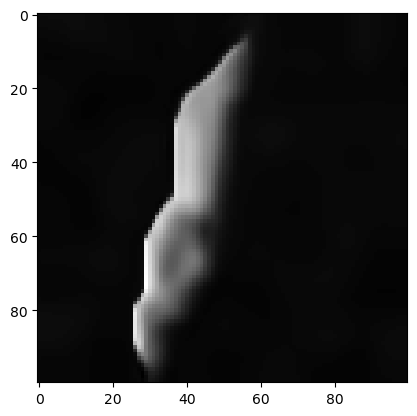

In [1]:
import bm3d_demo_grayscale
import os
import numpy as np
import matplotlib.pyplot as plt

# 输入图片路径
source_path = '/DATA/disk1/3dmodel/3dmodel/ISAR_NERF/asteroid_image_nerf_new/20db'
target_path = '/DATA/disk1/3dmodel/3dmodel/ISAR_NERF/asteroid_image_nerf_new/20db_denoise'


if not os.path.exists(target_path):
    os.makedirs(target_path)

# 读取文件夹下npz文件,npz文件中有image和LOS和rotation_axis
npz_files = [f for f in os.listdir(source_path) if f.endswith('.npz')]
for npz_file in npz_files:
    source_path = os.path.join(source_path, npz_file)
    target_path = os.path.join(target_path, npz_file)
    data = np.load(source_path)
    image = data['image']
    plt.imshow(image,cmap='gray')
    denoise_image = bm3d_demo_grayscale.denosie(image)
    
    plt.imshow(denoise_image,cmap='gray')
    np.savez(target_path, image=denoise_image, LOS=data['LOS'], rotation_axis=data['rotation_axis'])

# png_files = [f for f in os.listdir(source_folder) if f.endswith('.png')]
# for png_file in png_files:
#     source_path = os.path.join(source_folder, png_file)
#     target_path = os.path.join(target_folder, png_file)
#     denoise_image = bm3d_demo_grayscale.denosie(source_path)
#     # plt.imshow(denoise_image,cmap='gray')
#     denoise_image.save(target_path,'PNG')